### Linear Regression and Learning Curve challenges

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form $\beta_0 + \beta_1log(x) + \epsilon$. (You are making up the parameters.)

Simulate some data from this model.

In [2]:
np.random.seed(16)

def f(x):
    return 5*np.log(x) + np.random.normal()

In [3]:
X = np.random.random(100)
y = f(X)

In [4]:
X = X.reshape(-1, 1)

Then fit two models to it:

* quadratic (second degree polynomial)
* logarithmic (log(x))

(The second one should fit really well, since it has the same form as the underlying model!)

In [5]:
#values of x for plotting
x_plot = np.linspace(0, 1, 100)
x_plot = x_plot.reshape(-1, 1)

In [6]:
#make quadratic model
degree = 2
y_hat_quad = make_pipeline(PolynomialFeatures(degree), LinearRegression())
y_hat_quad.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

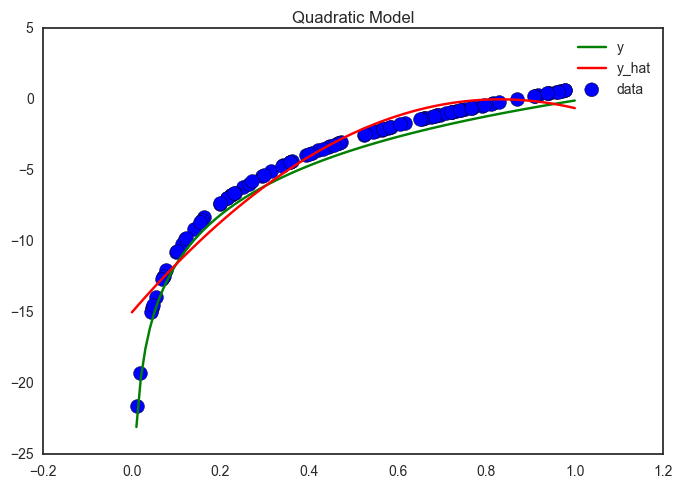

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label = 'y', color='green')
ax.plot(x_plot, y_hat_quad.predict(x_plot), label='y_hat', color='red')
ax.scatter(X, y, label='data', s=100)
ax.legend(loc='upper right')
ax.set_title('Quadratic Model');

In [8]:
#make log model
y_hat_log = LinearRegression()
y_hat_log.fit(np.log(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

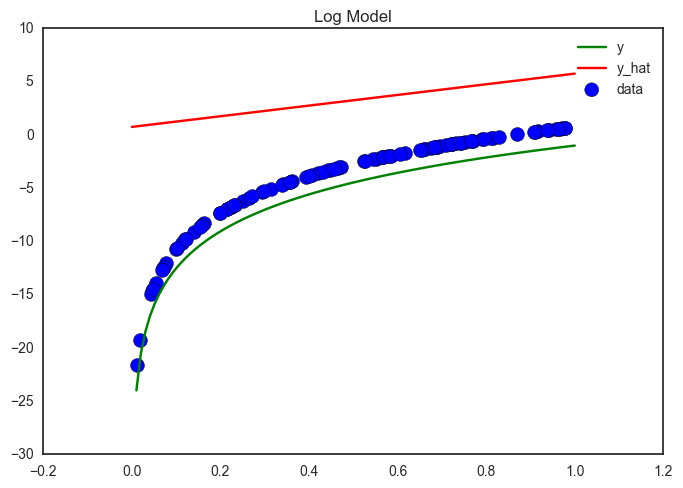

In [9]:
fig, ax = plt.subplots(1,1)
ax.plot(x_plot, f(x_plot), label = 'y', color='green')
ax.plot(x_plot, y_hat_log.predict(x_plot), label='y_hat', color='red')
ax.scatter(X, y, label='data', s=100)
ax.legend(loc='upper right')
ax.set_title('Log Model');

### Challenge 2

Generate (fake) data from a model of the form $\beta_0 + \beta_1x + \beta_2x^2 + \epsilon$. (You are making up the parameters.)

In [10]:
def f(x):
    return 5*x + 23*x**2 + np.random.normal()

In [11]:
X = np.random.random(100)
y = f(X)

In [12]:
X = X.reshape(-1, 1)

Split the data into a training and test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [14]:
y_hat = LinearRegression()
y_hat.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
#R^2
print 'Train R^2:', y_hat.score(X_train, y_train)
print 'Test R^2:', y_hat.score(X_test, y_test)

Train R^2: 0.956953460768
Test R^2: 0.951177550529


In [16]:
#mean squared error
print 'Train MSE:', metrics.mean_squared_error(y_train, y_hat.predict(X_train))
print 'Test MSE:', metrics.mean_squared_error(y_test, y_hat.predict(X_test))

Train MSE: 2.97598812954
Test MSE: 2.37977512723


### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

* training error
* test error
* R squared
* AIC

In [17]:
df = pd.DataFrame(data=None)

In [18]:
#make models from 0 to 7th order
for degree in range(0, 8):
    y_hat = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    y_hat.fit(X_train, y_train)
    train_error = metrics.mean_squared_error(y_train, y_hat.predict(X_train))
    test_error = metrics.mean_squared_error(y_test, y_hat.predict(X_test))
    R_squared = y_hat.score(X, y)
    df = df.append(pd.Series((degree, train_error, test_error, R_squared)), ignore_index=True)

In [19]:
columns = {0: 'degree',
           1: 'train_error',
           2: 'test_error',
           3: 'R_squared'
          }
df.rename(columns=columns, inplace=True)

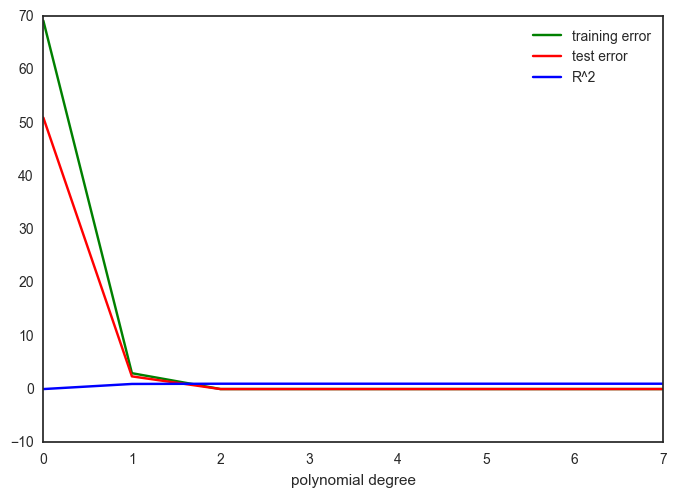

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot('degree', 'train_error', data=df, label='training error', color='green')
ax.plot('degree', 'test_error', data=df, label='test error', color='red')
ax.plot('degree', 'R_squared', data=df, label='R^2', color='blue')
ax.set_xlabel('polynomial degree')
ax.legend(loc='upper right');

### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [21]:
df = pd.DataFrame(data=None)

for m in range(5, ((len(X)+5)*3/4), 5):
    X_train, X_test, y_train, y_test = train_test_split(X[:m], y[:m], test_size=0.25, random_state=16)
    y_hat = LinearRegression()
    y_hat.fit(X_train, y_train)
    train_error = metrics.mean_squared_error(y_train, y_hat.predict(X_train))
    test_error = metrics.mean_squared_error(y_test, y_hat.predict(X_test))
    df = df.append(pd.Series((m, train_error, test_error)), ignore_index=True)

In [22]:
columns = {0: 'm',
           1: 'train_error',
           2: 'test_error',
          }
df.rename(columns=columns, inplace=True)

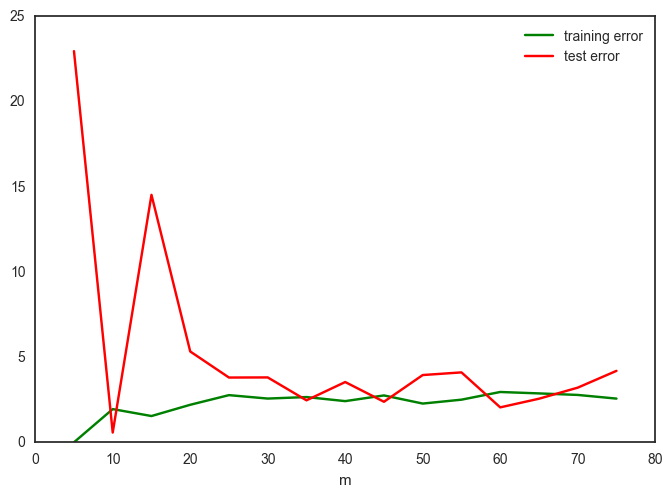

In [23]:
fig, ax = plt.subplots(1,1)
ax.plot('m', 'train_error', data=df, label='training error', color='green')
ax.plot('m', 'test_error', data=df, label='test error', color='red')
ax.set_xlabel('m')
ax.legend(loc='upper right');